In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime
plt.rcParams['figure.figsize'] = (11.0, 9.0)
%matplotlib inline

In [75]:
train = pd.read_csv('training.csv', low_memory=False)
test = pd.read_csv('predict.csv', low_memory=False)

In [76]:
# dividing into numerical and categorical 
cat = train.select_dtypes(include=['object'])
num = train.select_dtypes(exclude=['object'])

### Creating new features from posted_time

In [77]:
# complete date with hours
train['post'] = train['posted_time'].apply(lambda x: pd.Timestamp(x, unit='ms'))
train['post']

0      2017-12-23 17:26:40
1      2017-12-24 10:06:40
2      2017-12-24 12:53:20
3      2017-12-25 08:20:00
4      2017-12-25 08:20:00
               ...        
9413   2019-11-04 09:33:20
9414   2019-07-31 08:00:00
9415   2019-11-06 17:06:40
9416   2019-11-06 17:06:40
9417   2019-11-06 17:06:40
Name: post, Length: 9418, dtype: datetime64[ns]

In [78]:
# just date
train['post_date'] = train['posted_time'].apply(lambda x: pd.Timestamp(x, unit='ms').date())
train['post_date']

0       2017-12-23
1       2017-12-24
2       2017-12-24
3       2017-12-25
4       2017-12-25
           ...    
9413    2019-11-04
9414    2019-07-31
9415    2019-11-06
9416    2019-11-06
9417    2019-11-06
Name: post_date, Length: 9418, dtype: object

In [79]:
# just hour
train['hour_of_day'] = train['posted_time'].apply(lambda x: pd.Timestamp(x, unit='ms').time())
train['hour_of_day']

0       17:26:40
1       10:06:40
2       12:53:20
3       08:20:00
4       08:20:00
          ...   
9413    09:33:20
9414    08:00:00
9415    17:06:40
9416    17:06:40
9417    17:06:40
Name: hour_of_day, Length: 9418, dtype: object

In [ ]:
#tmp = pd.to_datetime(train['hour_of_day'])
train['hour_of_day_ms'] = train['hour_of_day'].dt.total_seconds()

In [80]:
# day of a week - Monday == 1 to Sunday == 7
train['day_of_week'] = train['posted_time'].apply(lambda x: pd.Timestamp(x, unit='ms').isoweekday())

### Day analysis

In [65]:
# choosing the day with the largest number of news
day1 = train.loc[train['post_date'] == datetime.date(2018, 6, 29)]

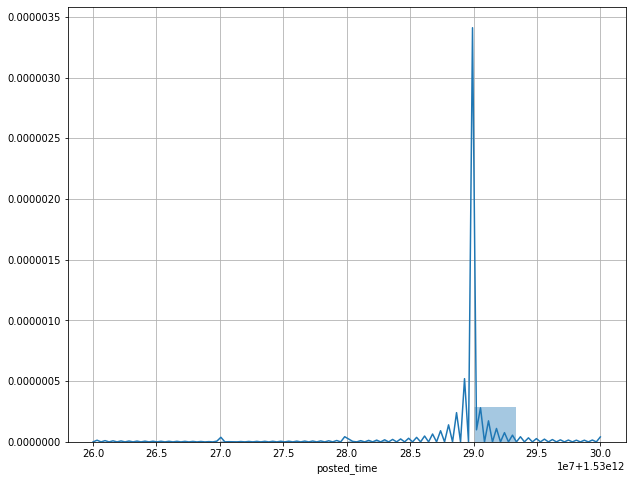

In [10]:
plt.figure(figsize=(10, 8))
sns.distplot(day1['posted_time'])
plt.grid()

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


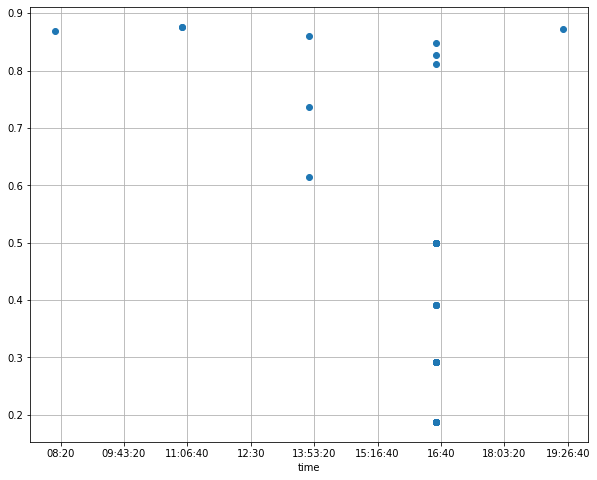

In [36]:
plt.figure(figsize = (10,8))
plt.plot_date(day1['hour_of_day'], day1['rank'])
plt.grid()
plt.show()

In [66]:
day2 = train.loc[train['post_date'] == datetime.date(2018, 3, 21)]
day2

,id,posted_time,updated_time,age,updated_age,app_type,owner_id,owner_type,owner_influence,number_of_likes,...,participant5_is_lead,participant5_is_in_connections,participant5_focus,participant5_order,participant5_influence,rank,post,post_date,hour_of_day,day_of_week
982,185316,1.521600e+12,1.521600e+12,5.560803e+10,5.560803e+10,other,117084,space,0.10000,0,...,0,1,marketing,1,0.23077,0.49789,2018-03-21 02:40:00,2018-03-21,02:40:00,3
983,185338,1.521620e+12,1.521630e+12,5.558491e+10,5.557848e+10,wiki,71304,space,0.99923,2,...,0,1,marketing,1,0.23077,0.82741,2018-03-21 08:13:20,2018-03-21,08:13:20,3
984,185356,1.521620e+12,1.521620e+12,5.558248e+10,5.558248e+10,calendar,13853,space,0.10000,0,...,0,1,marketing,1,0.23077,0.49911,2018-03-21 08:13:20,2018-03-21,08:13:20,3
985,185378,1.521630e+12,1.521630e+12,5.557908e+10,5.557908e+10,wiki,50732,space,0.10000,0,...,0,1,marketing,1,0.23077,0.49907,2018-03-21 11:00:00,2018-03-21,11:00:00,3
986,185404,1.521630e+12,1.521640e+12,5.557130e+10,5.556624e+10,other,57727,space,0.99973,4,...,0,0,marketing,1,0.99332,0.86088,2018-03-21 11:00:00,2018-03-21,11:00:00,3
987,185417,1.521640e+12,1.521790e+12,5.556476e+10,5.541356e+10,other,9037,space,0.99949,0,...,0,1,other,1,0.99693,0.86820,2018-03-21 13:46:40,2018-03-21,13:46:40,3
988,185422,1.521640e+12,1.521640e+12,5.556387e+10,5.556376e+10,other,114193,space,0.95633,1,...,0,1,other,1,0.23077,0.68715,2018-03-21 13:46:40,2018-03-21,13:46:40,3
989,185423,1.521640e+12,1.521640e+12,5.556387e+10,5.556374e+10,other,114193,space,0.95633,2,...,0,1,other,1,0.23077,0.74326,2018-03-21 13:46:40,2018-03-21,13:46:40,3
990,185432,1.521640e+12,1.521640e+12,5.556262e+10,5.556262e+10,other,114193,space,0.95633,0,...,0,1,marketing,1,0.23077,0.49929,2018-03-21 13:46:40,2018-03-21,13:46:40,3
991,185433,1.521640e+12,1.521640e+12,5.556253e+10,5.556253e+10,other,114193,space,0.95633,0,...,0,1,marketing,1,0.23077,0.49929,2018-03-21 13:46:40,2018-03-21,13:46:40,3


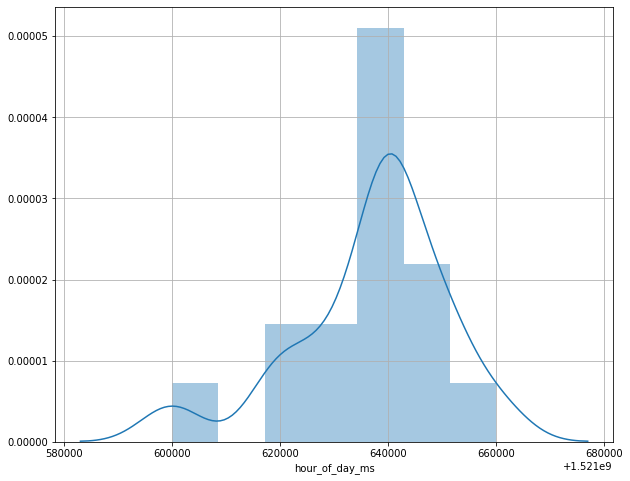

In [44]:
plt.figure(figsize=(10, 8))
sns.distplot(day2['hour_of_day_ms'])
plt.grid()
plt.show()

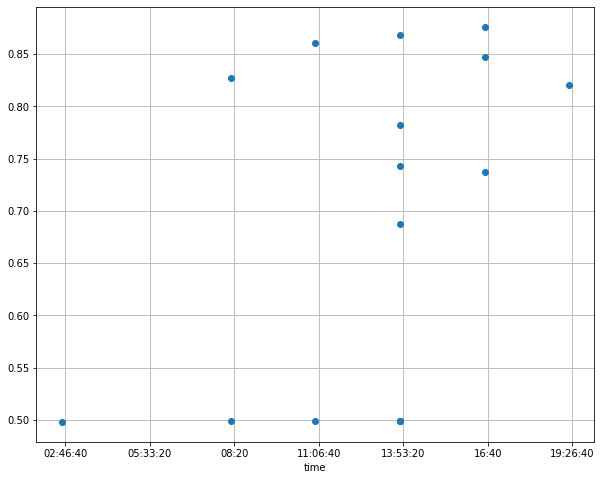

In [38]:
plt.figure(figsize = (10,8))
plt.plot_date(day2['hour_of_day'], day2['rank'])
plt.grid()
plt.show()

In [39]:
train.sort_values(by='post_date', inplace=True)
train.set_index('post_date', inplace=True)

In [ ]:
# selecting just one week (but there is no Saturday in this specific one)
start_date = pd.to_datetime('2019-10-28').date()
end_date = pd.to_datetime('2019-11-03').date()
week = train.loc[start_date : end_date]

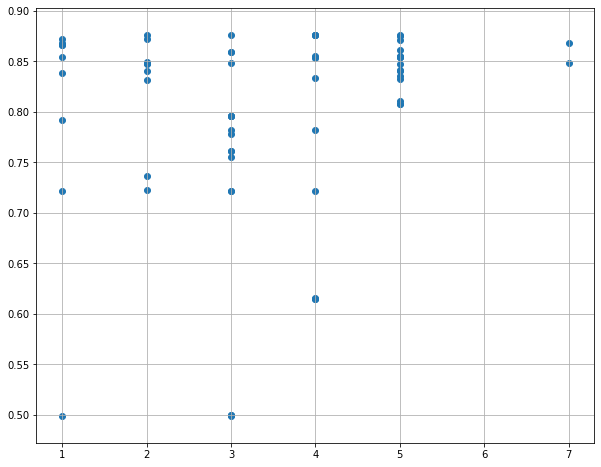

In [41]:
plt.figure(figsize = (10,8))
plt.scatter(week['day_of_week'], week['rank'])
plt.grid()
plt.show()

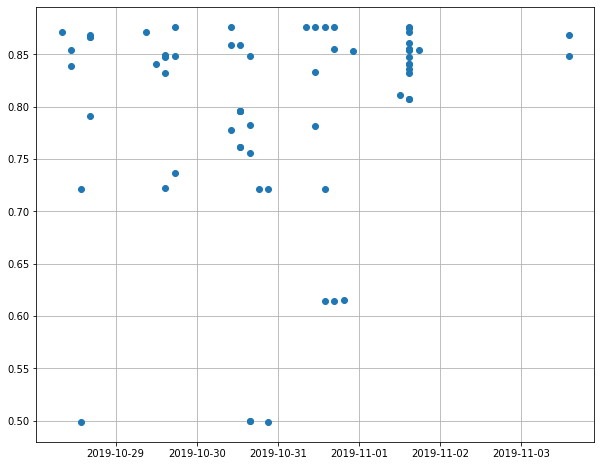

In [52]:
plt.figure(figsize = (10,8))
plt.plot_date(week['post'], week['rank'])
plt.grid()
plt.show()

## Skewness

In [83]:
num.columns

Index(['id', 'posted_time', 'updated_time', 'age', 'updated_age', 'owner_id',
       'owner_influence', 'number_of_likes', 'number_of_comments',
       'reactivity', 'is_mentions_me', 'is_mentions_connections',
       'is_commented_by_me', 'is_commented_by_connections', 'is_liked_by_me',
       'is_liked_by_connections', 'poster_id', 'poster_is_employee',
       'poster_is_lead', 'poster_is_in_connections', 'poster_order',
       'poster_influence', 'participant1_id', 'participant1_is_employee',
       'participant1_is_lead', 'participant1_is_in_connections',
       'participant1_order', 'participant1_influence', 'participant2_id',
       'participant2_is_employee', 'participant2_is_lead',
       'participant2_is_in_connections', 'participant2_order',
       'participant2_influence', 'participant3_id', 'participant3_is_employee',
       'participant3_is_lead', 'participant3_is_in_connections',
       'participant3_order', 'participant3_influence', 'participant4_id',
       'participant

In [87]:
# skewness for numerical features
from scipy.stats import skew
skewness = num.apply(lambda x: skew(x))

In [91]:
skewed_cols = list(skewness[abs(skewness) > 1].index)
skewed_cols

['owner_influence',
 'number_of_likes',
 'number_of_comments',
 'is_mentions_me',
 'is_mentions_connections',
 'is_commented_by_me',
 'is_liked_by_me',
 'poster_is_in_connections',
 'poster_influence',
 'participant1_is_in_connections',
 'participant1_influence',
 'participant2_is_in_connections',
 'participant3_is_in_connections',
 'participant4_id',
 'participant4_is_in_connections',
 'participant5_id',
 'participant5_is_in_connections',
 'rank']

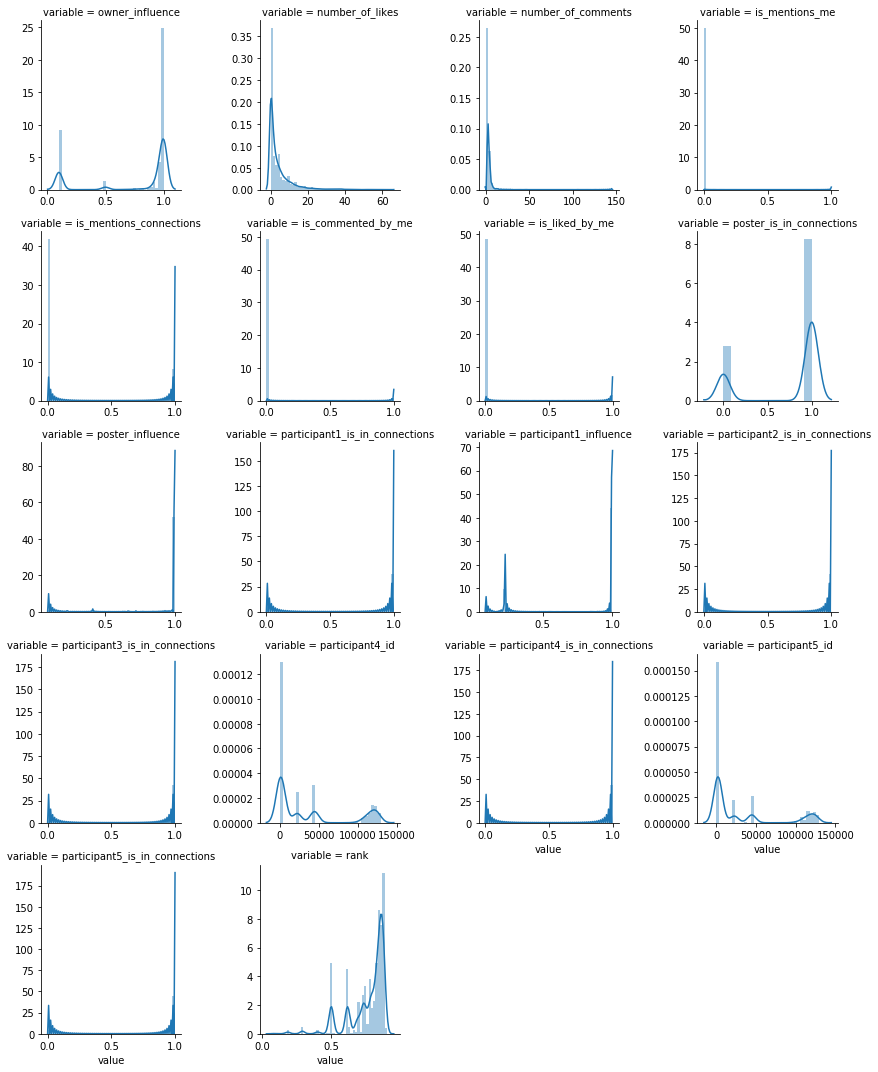

In [92]:
nd = pd.melt(train, value_vars = skewed_cols)
n1 = sns.FacetGrid(nd, col = 'variable', col_wrap = 4, sharex = False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1